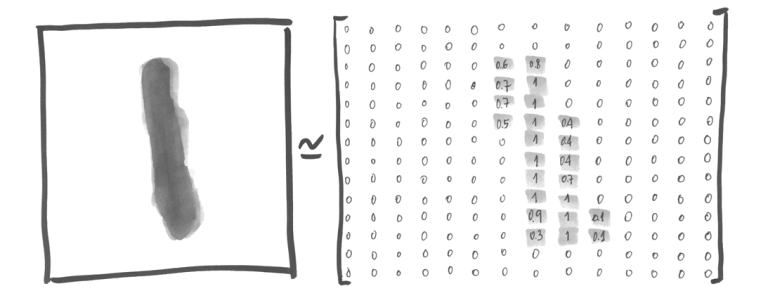

#### MNIST Introduction
- MNIST (Mixed National Institute of Standards and Technology database)
- **손글씨 숫자(0~9) 이미지 데이터**
- 각 이미지는 **가로와 세로가 각각 28px, 흑백 이미지**로 만들어져 있음
- Training data == 55,000장, Validation data == 5,000장, Test data = 10,000장

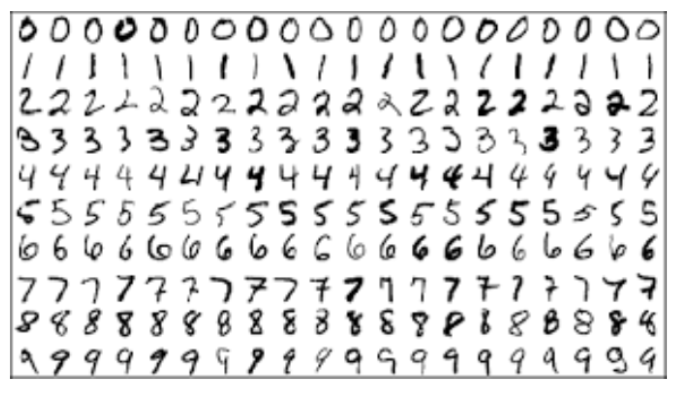

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


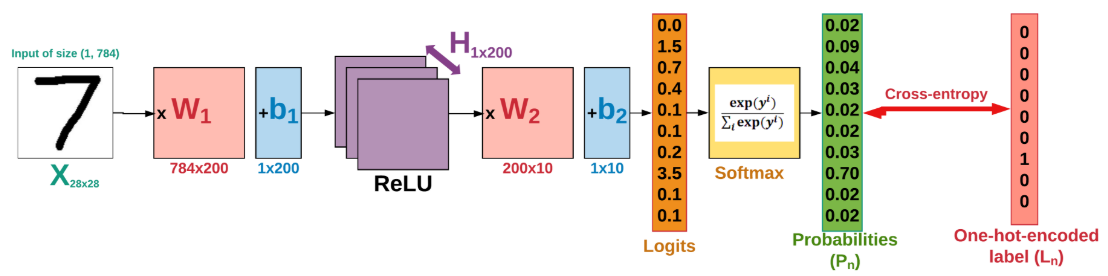

In [3]:
# mnist -> train / test / validation
# mnist 안쪽에 3개로 데이터가 나눠져 있음

# mnist.train -> 'images'(x_data) 'labels'(y_data), 'num_examples'

type(mnist.train.images) # 자료혐 = numpy.ndarray

numpy.ndarray

In [4]:
mnist.train.images.shape 
#images = x데이터

(55000, 784)

In [6]:
mnist.train.labels.shape 
#labels = y데이터

(55000, 10)

In [7]:
import pandas as pd 

df = pd.DataFrame(mnist.train.labels) # to pd.DataFrame
df.head()
#training data의 정답 데이터

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2. Build the model

In [9]:
# 데이터가 흘러들어올 접시(placeholder) 만들기 
# 이제는 tf.run 돌리기 전까지 xdata ydata 건들이지 않음

X = tf.placeholder(tf.float32, [None, 784]) # [# of batch data, # of features(columns) == 총 784개의 열]
Y = tf.placeholder(tf.float32, [None, 10]) # 0~9 == 총 10개의 열

In [10]:
# 모든 Parameter Theta는 Variable로 선언
# Weight의 열수(W1 - 256)는 Weight가 꽂힐 hidden Layer(L1)의 노드수

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

In [11]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [12]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3) # 마지막 층도 행렬곱까지만 진행

#### 3. Set the criterion

In [14]:
# cost = tf.losses.mean_squared_error(Y, model) # for Regression

cost = tf.losses.softmax_cross_entropy(Y, model) # for Classification, "cross-entropy" after "softmax"
#softmax_cross_entropy: 모델이 낸 예측값에 대해 softmax 씌워주고, 알아서 정답이랑 같이 정리
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost) # Select optimizer & connect with cost function (recommended start : "Adam")

#### 4. Train the model

In [16]:
init = tf.global_variables_initializer() # Initialize all global variables (Parameter Theta)
sess = tf.Session()
sess.run(init)

In [17]:
#test - mnist.train.num_examples는 train데이터의 갯수 의미
mnist.train.num_examples

55000

In [18]:
# Gradient descent를 적용하기 전까지 한번에 밀어넣는 데이터의 수 지정 (Batch size == 하나의 데이터 덩어리 내 데이터 수)

batch_size = 100
#55000개 중100개의 이미지마다 cross entropy계산 -> 100개 후 밀어넣음
total_batch = int(mnist.train.num_examples / batch_size)
print(total_batch)

#550 = 총 밀어넣어야 하는 횟수

550


In [ ]:
#데이터중 지정한 숫자만큼 꺼내서 batch data x, y로 돌려줌

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [26]:
!pip install tqdm==4.31.1

In [53]:
from tqdm import trange, tqdm_notebook
for epoch in tqdm_notebook(range(15)):

# for epoch in range(15):   # 전체 데이터(55000개)를 15번 돌린다
    total_cost = 0

    for i in range(total_batch): # iterate over # of batches # 550번 넣는다 = 100개(batch_size)씩 들어간다
        batch_xs, batch_ys = mnist.train.next_batch(100)  #랜덤하게 100개를 뽑는다

        _, cost_val = sess.run([optimizer, cost], 
                               feed_dict={X: batch_xs, Y: batch_ys}) # 먹여줄(feed) 딕셔너리(dict)  # placeholder X, Y 안에 원본데이터 넣기
        total_cost += cost_val

    test_cost = sess.run([cost], feed_dict={X: mnist.test.images, Y: mnist.test.labels}) # current test error
    
    print('Epoch: {}'.format(epoch+1), 
          '|| Avg. Training cost = {:.3f}'.format(total_cost / total_batch),
          '|| Current Test cost = {:.3f}'.format(test_cost[0]))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.009 || Current Test cost = 0.100
Epoch: 2 || Avg. Training cost = 0.006 || Current Test cost = 0.110
Epoch: 3 || Avg. Training cost = 0.009 || Current Test cost = 0.110
Epoch: 4 || Avg. Training cost = 0.005 || Current Test cost = 0.129
Epoch: 5 || Avg. Training cost = 0.013 || Current Test cost = 0.120
Epoch: 6 || Avg. Training cost = 0.009 || Current Test cost = 0.113
Epoch: 7 || Avg. Training cost = 0.006 || Current Test cost = 0.116
Epoch: 8 || Avg. Training cost = 0.007 || Current Test cost = 0.114
Epoch: 9 || Avg. Training cost = 0.007 || Current Test cost = 0.148
Epoch: 10 || Avg. Training cost = 0.008 || Current Test cost = 0.118
Epoch: 11 || Avg. Training cost = 0.004 || Current Test cost = 0.131
Epoch: 12 || Avg. Training cost = 0.007 || Current Test cost = 0.146
Epoch: 13 || Avg. Training cost = 0.008 || Current Test cost = 0.107
Epoch: 14 || Avg. Training cost = 0.005 || Current Test cost = 0.132
Epoch: 15 || Avg. Training cost = 0.008 || 

In [52]:
# from tqdm import trange, tqdm_notebook
#     for epoch in tqdm_notebook(range(15)):
#         total_cost = 0

#     #for epoch in range(15): #전체 데잍터를 몇번 밀어넣는가 = 55000장을 15번 밀어넣음
        
#         #total_cost = 0

#            for i in range(total_batch): #  total_batch = 550
#                    batch_xs, batch_ys = mnist.train.next_batch(100)
#                 #mmnist.train.next_batch = random하게 100개 출력

#             #for batch_xs, batch_ys in shuffle_batch(X_train, y_train, batch_size)

#                     _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys}) # 먹여줄(feed) 딕셔너리(dict)
#                 #optimizer가 주인공
#                 #*****feed_dict: run 돌릴 때 되어서야 맥락에 따라 데이터를 흘려보냄
#                     total_cost += cost_val

#             test_cost = sess.run([cost], feed_dict={X: mnist.test.images, Y: mnist.test.labels}) # current test error
#             # 의도: 550번 다 돌고 나면(1 에폭마다) test data에 대한 cost 확인해보자
#             #(학습엔 중요하지 않지만 모니터링해야 확인하기 쉬움)

#             print('Epoch: {}'.format(epoch+1), 
#                   '|| Avg. Training cost = {:.3f}'.format(total_cost / total_batch),
#                   '|| Current Test cost = {:.3f}'.format(test_cost[0]))

#         print('Learning process is completed!')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

In [50]:
# next_batch() 함수를 이용할 수 없는 다른 데이터셋의 경우, 
# 직접 batch 함수를 만들어쓰려면 아래의 코드를 활용해주세요. 

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

# (original) 
for i in range(total_batch): 
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    ~~~
# (new) 
for batch_xs, batch_ys in shuffle_batch(X_train, y_train, batch_size): 
    ~~~

SyntaxError: invalid syntax (<ipython-input-50-c220fadcd651>, line 14)

#### 5. Test the model

In [20]:
# tf.argmax([0.1 0 0 0.7 0 0.2 0 0 0 0]) -> 3 (가장 큰 값의 index를 return)
# argmax = 주어진 데이터를 대상으로 제일 큰 값에 인덱스를 줌
# model = 예측한 값

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)) # model : 예측값, Y : 실제 정답
#모델이 총  4개를 대상으로 예측했는데 반은 맞추고 반은 틀림
#데이터 한 행마다 equal을 적용하면 결과값이 t,t,f,f가 나옴

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # 자료형 변환(type-"cast") 후, 차원을 줄이면서(reduce) 평균(mean) 계산
#cast: 이 결과를 가지고 먼저 float 형태로 바꿈
#reduce_mean: 다음 결과를 평균냄

In [21]:
print('정확도 :', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))
#모델을 한 번도 쓰지 않은채 accuracy만 사용해도 되나?
# 위에 is_correct가 결국 모델과 연결되어 있음
#그래서 accuracy 하나만 실행해도 데이터가 쭉 올라가서 결과 얻을 수 있음

정확도 : 0.9818


In [24]:
predicted_labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print(list(predicted_labels))

#하나의 행이 하나의 리스트
#1행(1번 이미지)에서 가장 높은 것은 7
#2행은 2

[array([-10.469632 ,  -2.9115758,   1.2621365,  -6.8059144, -20.007963 ,
       -12.570527 , -33.066685 ,  20.025557 , -11.710632 ,  -7.4417577],
      dtype=float32), array([-11.04111  ,  -1.9490111,  23.408516 ,  -3.5437346, -36.495235 ,
       -13.961523 , -12.644003 , -17.366102 ,  -6.2780733, -45.78129  ],
      dtype=float32), array([-13.962162 ,  11.2989435,  -1.2845571,  -7.690577 ,  -4.9935107,
        -8.150069 ,  -5.034035 ,  -2.5569355,  -1.5367167, -18.759542 ],
      dtype=float32), array([ 16.331127  , -18.324427  ,   0.09163364,  -9.693643  ,
       -16.6262    ,  -8.496865  ,  -4.5872765 , -11.371794  ,
        -9.349053  ,  -6.788722  ], dtype=float32), array([ -5.961224 ,  -9.747932 ,  -7.705191 , -20.553534 ,  14.514156 ,
       -17.124603 , -10.350555 ,  -2.470732 , -11.316871 ,   2.6304884],
      dtype=float32), array([-14.880665 ,  14.71424  ,  -4.003771 , -10.32342  ,  -3.2321265,
       -17.369276 , -13.472302 ,   2.049304 ,  -5.596524 , -18.294939 ],
      dt

In [22]:
# 모델 예측 결과값
# 결과가 어떻게 나왔는지 위에서 확인

predicted_labels = sess.run(tf.argmax(model, 1), feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print(list(predicted_labels)[:10])

#output layer를 실행하면서 test data image x를 밀어 넣음(y는 필요 없다고 함)
# 이 모델은 숫자 10개를 돌려줌

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [25]:
# 실제 정답 

import numpy as np
print(np.argmax(mnist.test.labels, 1)[:10])

[7 2 1 0 4 1 4 9 5 9]
